# This is  the mnist dataset

In [1]:
from sklearn.datasets import fetch_openml 
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import os # to beep me when cells are executed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [59]:
print('The mnist file is a dictionary type file with keys',list(mnist.keys()))

The mnist file is a dictionary type file with keys ['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [60]:
print("File description: using key '", list(mnist.keys())[6],"'\n\n",mnist[list(mnist.keys())[6]])

File description: using key ' DESCR '

 **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the

In [64]:
print("File details: using key '", list(mnist.keys())[7],"'\n\n",mnist[list(mnist.keys())[7]])

File details: using key ' details '

 {'id': '554', 'name': 'mnist_784', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'], 'upload_date': '2014-09-29T03:28:38', 'language': 'English', 'licence': 'Public', 'url': 'https://old.openml.org/data/v1/download/52667/mnist_784.arff', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq', 'status': 'active', 'processing_date': '2020-11-20 20:12:09', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


f = open("dict.txt","w")
f.write( str(mnist) ) # write file
f.close() # close file

f = open("dict.txt", "r")
downloaded = f.read()

In [66]:
# assigning values to predictor and target variables  
X, y = mnist.data, mnist.target # X=predictor, y=target

# I pick a random element, i.e. a 784 element array.

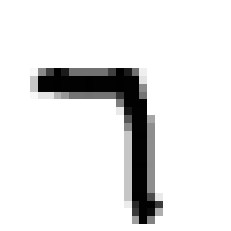

which is the number 7


In [67]:
import matplotlib as mpl
 
rn = random.randrange(len(mnist.data))
random_digit = X.loc[rn]
random_digit_image = random_digit.values.reshape(28,28)
plt.imshow(random_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print('which is the number',y.loc[rn])

In [68]:
y = y.astype(np.uint8) #changes the variable type to uint8

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [70]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

# random stuff

y_train_dict = {}
for n in range(0,10):
    y_train_dict[str(n)] = (y_train == n)

import random
from sklearn.linear_model import SGDClassifier
random_number = random.randrange(0,len(X_test))
random_index = X_test.index.values[random_number]
#X_test.loc[random_index]
#y_test.loc[random_index]
sgd_cl_for = {}
results = {}
for n in range(0,10):
    sgd_cl_for[str(n)] = SGDClassifier(random_state=42)
    sgd_cl_for[str(n)].fit(X_train,y_train_dict[str(n)])
    print("finished training with SGD classifier for number",n)

correct = 0
counter = 0

import random
import pandas as pd

random_number = random.randrange(0,len(X_test))
random_index = X_test.index.values[random_number]
results = pd.DataFrame()
for n in range(0,10):
    #print(sgd_cl_for[str(n)].predict([X_test.loc[random_index]]))
    results[str(n)] = sgd_cl_for[str(n)].decision_function([X_test.loc[random_index]])

print ('Decision function matrix\n',results)
#plt.imshow(random_digit_image, cmap = mpl.cm.binary, interpolation="nearest")

plt.imshow(X_test.loc[random_index].values.reshape(28,28),cmap=mpl.cm.binary)
plt.axis('off')
print("\nFrom the training, it looks more like a", results.values.argmax())
counter = counter + 1
if (results.values.argmax() == y_test.loc[random_index]):
    correct = correct + 1
accuracy = correct/counter
print('\naccuracy is', accuracy*100,'%')

for m in range(0,1000):
    random_number = random.randrange(0,len(X_test))
    random_index = X_test.index.values[random_number]
    results = pd.DataFrame()
    for n in range(0,10):
        #print(sgd_cl_for[str(n)].predict([X_test.loc[random_index]]))
        results[str(n)] = sgd_cl_for[str(n)].decision_function([X_test.loc[random_index]])

    print ('Decision function matrix\n',results)
    #plt.imshow(random_digit_image, cmap = mpl.cm.binary, interpolation="nearest")

    plt.imshow(X_test.loc[random_index].values.reshape(28,28),cmap=mpl.cm.binary)
    plt.axis('off')
    print("\nFrom the training, it looks more like a", results.values.argmax())
    counter = counter + 1
    if (results.values.argmax() == y_test.loc[random_index]):
        correct = correct + 1
    accuracy = correct/counter
    print('\naccuracy is', accuracy*100,'%')

import random
random_number = random.randrange(0,len(X_test))
random_index = X_test.index.values[random_number]
print(sgd_cl.predict([X_test.loc[random_index]]),y_test.loc[random_index])
sgd_cl.decision_function([X_test.loc[random_index]])

from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)


# end of random stuff

# Let's use sklearn multiclass calssification

In [71]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import balanced_accuracy_score

# One Vs One Classifier

In [72]:
One_vs_One_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
One_vs_One_clf.fit(X_train,y_train)
os.system(' say "η εκπαίδευση του One versus One ολοκληρώθηκε" ')

0

prediction: [0] 
real :  0


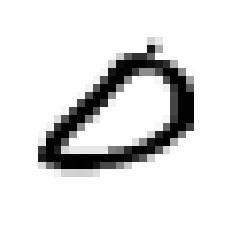

decision function : [ 9.33333325 -0.33333325  5.33333252  2.66666723  1.66666733  7.33333304
  8.33333314  3.66666712  2.66666693  3.66666724]


In [73]:
random_number = random.randrange(0,len(X_test))
random_index = X_test.index.values[random_number]
print('prediction:',One_vs_One_clf.predict([X_test.loc[random_index]]),'\nreal : ',y_test.loc[random_index])
One_vs_One_clf.decision_function([X_test.loc[random_index]])
plt.imshow(X_test.loc[random_index].values.reshape(28,28),cmap=mpl.cm.binary)
plt.axis('off')
plt.show()
print('decision function :',One_vs_One_clf.decision_function([X_test.loc[random_index]]).ravel())

In [74]:
y_predictions = One_vs_One_clf.predict(X_test.values)
os.system(' say "δημιουργήθηκε ο πίνακας με τις προβλέψεις" ')

0

# Balanced accuracy score

In [75]:
print('balanced accuracy is :', round(balanced_accuracy_score(y_test,y_predictions),2))

balanced accuracy is : 0.92


# Confusion matrix

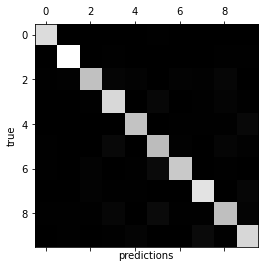

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predictions)
plt.matshow(cm,cmap=plt.cm.gray)#,figsize=(10,10))
plt.xlabel('predictions')
plt.ylabel('true')
plt.show()

In [77]:
cm
row_sum = cm.sum(axis=1,keepdims=True)

# Normalised Confusion matrix

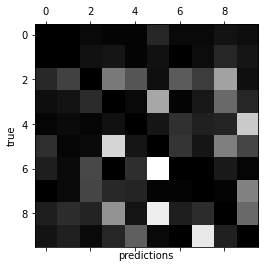

In [78]:
normalised_cm = cm/row_sum
np.fill_diagonal(normalised_cm,0)
plt.matshow(normalised_cm,cmap=plt.cm.gray)#,figsize=(10,10))
plt.xlabel('predictions')
plt.ylabel('true')
plt.show()

# One can see here that:
# - 3s, 6s and 8s get easily missclassified as 5s
# - 5s get easily missclassified as 3s
# - 9s get easily missclassified as 7s

# Lets checkout 3s VS 5s

for i in range(0,10):
    image = X_train.loc[index_3s[i]].values.reshape(28,28)
    #plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    #plt.axis("off")
    #plt.show()    

plt.imshow(random_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y.loc[random])

f = str(2)+str(24)
plt.figure(figsize=(8,8))
plt.subplot(221) ; plt.axis('off') ; plt.imshow(X_3s_as_5s[:1].values.reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest") 
plt.subplot(222) ; plt.axis('off') ; plt.imshow(X_3s_as_5s[:1].values.reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest") 
plt.subplot(223) ; plt.axis('off') ; plt.imshow(X_3s_as_5s[:1].values.reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest")
plt.subplot(int(f)) ; plt.axis('off') ; plt.imshow(X_3s_as_5s[:1].values.reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest")
plt.show()
# equivalent but more general
#ax1 = plt.subplot(2, 2, 1)
#ax2 = plt.subplot(222, frameon=False)

In [79]:
y_predictions


array([8, 4, 8, ..., 2, 4, 4], dtype=uint8)

In [80]:
y_preds = pd.Series(y_predictions, index = y_test.index.values)
y_preds

46730    8
48393    4
41416    8
34506    7
43725    7
        ..
67628    3
42728    9
24612    2
37000    4
13856    4
Length: 10500, dtype: uint8

In [82]:
#y_test.tolist()
X_3s_as_3s = X_test[ (y_test==3) & (y_preds==3) ]
X_3s_as_5s = X_test[ (y_test==3) & (y_preds==5) ]
X_5s_as_3s = X_test[ (y_test==5) & (y_preds==3) ]
X_5s_as_5s = X_test[ (y_test==5) & (y_preds==5) ]

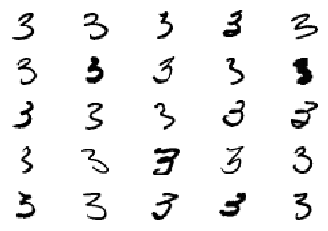

In [83]:
#plt.figure(figsize=(8,8))
def plot_digits(digits_df,number_of_rows):
    while pow(number_of_rows,2)>len(digits_df):
        number_of_rows -=1
        print('not enough digits, reduced number of rows to',number_of_rows)
    idx = digits_df.index.tolist()
    number = pow(number_of_rows,2)
    for n in range(1,number+1):
        #coord = str(33)+str(n)
        #print(coord)
        plt.subplot(number_of_rows,number_of_rows,n)
        plt.axis('off')
        #print(digits_df)
        plt.imshow(digits_df.loc[idx[n]].values.reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest" )
        #print(digits_df[index[n]])
plot_digits(X_3s_as_5s,5)

In [84]:
One_vs_One_clf.predict( [ X_test.loc[X_test.index[1]] ]  )

array([4], dtype=uint8)


3s predicted as 5s


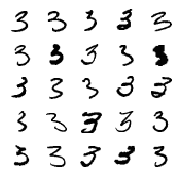


3s predicted as 3s


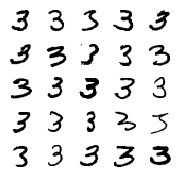


5s predicted as 3s


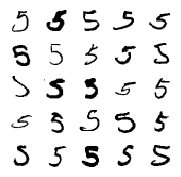


5s predicted as 5s


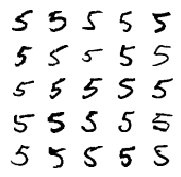

In [85]:
plt.figure(figsize=(3,3))
print('\n3s predicted as 5s')
plot_digits(X_3s_as_5s,5)
plt.show()

plt.figure(figsize=(3,3))
print('\n3s predicted as 3s')
plot_digits(X_3s_as_3s,5)
plt.show()

plt.figure(figsize=(3,3))
print('\n5s predicted as 3s')
plot_digits(X_5s_as_3s,5)
plt.show()

plt.figure(figsize=(3,3))
print('\n5s predicted as 5s')
plot_digits(X_5s_as_5s,5)
plt.show()

In [86]:
print('One can see why the 3s are confused with the 5s and vice versa')

One can see why the 3s are confused with the 5s and vice versa


# Lets the k neighbors classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
neigh_clf = KNeighborsClassifier(n_neighbors=5, 
                                        weights='uniform',#'distance'
                                        algorithm='auto', 
                                        leaf_size=30, 
                                        p=2, 
                                        metric='minkowski',
                                        metric_params=None, 
                                        n_jobs=None)

neigh_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
y_predictions_KNN=neigh_clf.predict(X_test.values)

In [90]:
print('The balance accuracy for the KNN is',round(balanced_accuracy_score(y_test,y_predictions_KNN),2))

The balance accuracy for the KNN is 0.97


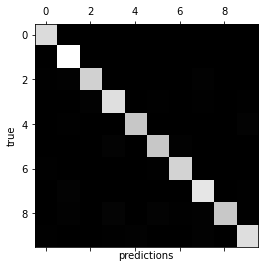

In [91]:
cm_KNN = confusion_matrix(y_test,y_predictions_KNN)
plt.matshow(cm_KNN,cmap=plt.cm.gray)#,figsize=(10,10))
plt.xlabel('predictions')
plt.ylabel('true')
plt.show()

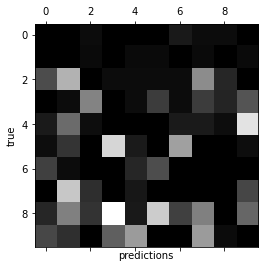

In [92]:
normalised_cm_KNN = cm_KNN/row_sum
np.fill_diagonal(normalised_cm_KNN,0)
plt.matshow(normalised_cm_KNN,cmap=plt.cm.gray)#,figsize=(10,10))
plt.xlabel('predictions')
plt.ylabel('true')
plt.show()

In [93]:
normalised_cm_KNN

array([[0.        , 0.        , 0.00096618, 0.        , 0.        ,
        0.        , 0.00193237, 0.00096618, 0.00096618, 0.        ],
       [0.        , 0.        , 0.00082988, 0.        , 0.00082988,
        0.00082988, 0.        , 0.00082988, 0.        , 0.00082988],
       [0.00588813, 0.01373896, 0.        , 0.00098135, 0.00098135,
        0.00098135, 0.00098135, 0.0107949 , 0.00294406, 0.        ],
       [0.        , 0.00092507, 0.01017576, 0.        , 0.00092507,
        0.00462535, 0.00092507, 0.00462535, 0.00277521, 0.00647549],
       [0.00206612, 0.00826446, 0.00103306, 0.        , 0.        ,
        0.        , 0.00206612, 0.00206612, 0.00103306, 0.01756198],
       [0.00103093, 0.00412371, 0.        , 0.01649485, 0.00206186,
        0.        , 0.01237113, 0.        , 0.        , 0.00103093],
       [0.0049554 , 0.00099108, 0.        , 0.        , 0.00297324,
        0.00594648, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01531532, 0.0036036

In [94]:
y_predictions_KNN

array([8, 4, 8, ..., 2, 4, 4], dtype=uint8)

In [95]:
y_preds = pd.Series(y_predictions_KNN, index = y_test.index.values)



not enough digits, reduced number of rows to 4
not enough digits, reduced number of rows to 3
not enough digits, reduced number of rows to 2


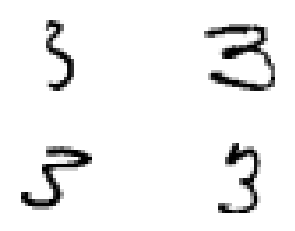

In [96]:
#y_test.tolist()
X_3s_as_3s = X_test[ (y_test==3) & (y_preds==3) ]
X_3s_as_5s = X_test[ (y_test==3) & (y_preds==5) ]
X_5s_as_3s = X_test[ (y_test==5) & (y_preds==3) ]
X_5s_as_5s = X_test[ (y_test==5) & (y_preds==5) ]

#plt.figure(figsize=(8,8))
def plot_digits(digits_df,number_of_rows):
    while pow(number_of_rows,2)>len(digits_df):
        number_of_rows -=1
        print('not enough digits, reduced number of rows to',number_of_rows)
    idx = digits_df.index.tolist()
    number = pow(number_of_rows,2)
    for n in range(1,number+1):
        #coord = str(33)+str(n)
        #print(coord)
        plt.subplot(number_of_rows,number_of_rows,n)
        plt.axis('off')
        #print(digits_df)
        plt.imshow(digits_df.loc[idx[n]].values.reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest" )
        #print(digits_df[index[n]])
plot_digits(X_3s_as_5s,5)


3s predicted as 5s
not enough digits, reduced number of rows to 2


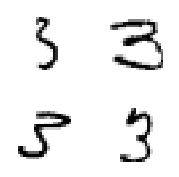


3s predicted as 3s


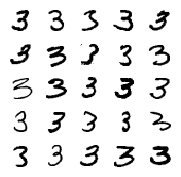


5s predicted as 3s


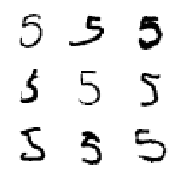


5s predicted as 5s


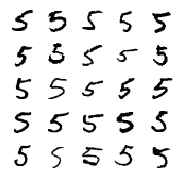

In [97]:
plt.figure(figsize=(3,3))
print('\n3s predicted as 5s')
plot_digits(X_3s_as_5s,3)
plt.show()

plt.figure(figsize=(3,3))
print('\n3s predicted as 3s')
plot_digits(X_3s_as_3s,5)
plt.show()

plt.figure(figsize=(3,3))
print('\n5s predicted as 3s')
plot_digits(X_5s_as_3s,3)
plt.show()

plt.figure(figsize=(3,3))
print('\n5s predicted as 5s')
plot_digits(X_5s_as_5s,5)
plt.show()

In [98]:
X_3s_as_3s.shape, X_3s_as_5s.shape, X_5s_as_3s.shape, X_5s_as_5s.shape



((1047, 784), (5, 784), (16, 784), (934, 784))

In [99]:
from sklearn.model_selection import GridSearchCV

help(GridSearchCV)

neigh_clf = KNeighborsClassifier(n_neighbors=4, 
                                        weights='distance',#,'uniform'
                                        algorithm='auto', 
                                        leaf_size=30, 
                                        p=2, 
                                        metric='minkowski',
                                        metric_params=None, 
                                        n_jobs=1)

neigh_clf.fit(X_train,y_train)

In [100]:
parameter_space = {'n_neighbors':[1,2,3,4,5], 'p':[1, 2], 'weights':['uniform','distance']}
gridsearch = GridSearchCV(KNeighborsClassifier(),param_grid = parameter_space, scoring ='balanced_accuracy')

gridsearch.fit(X_train[:10000],y_train[:10000])
os.system(' say "βελτιστοποίηση παραμέτρων ολοκληρώθηκε" ')

#print(gridsearch.best_params_)
print(gridsearch.best_params_)

# Lets plug the best hyperparameters

In [102]:
neigh_clf = KNeighborsClassifier(n_neighbors=4, 
                                        weights='distance',#,'uniform'
                                        algorithm='auto', 
                                        leaf_size=30, 
                                        p=2, 
                                        metric='minkowski',
                                        metric_params=None, 
                                        n_jobs=1)

neigh_clf.fit(X_train,y_train)
os.system(' say " κάππα γείτονες ολοκληρώθηκαν" ')

0

In [103]:
y_predictions_KNN=neigh_clf.predict(X_test.values)

os.system(' say "δημιουργήθηκε ο πίνακας με τις προβλέψεις" ')

0

In [104]:
print('balanced accuracy is', round(balanced_accuracy_score(y_test,y_predictions_KNN),2))

balanced accuracy is 0.97


from sklearn.metrics import SCORERS
SCORERS.keys()